## Basics of Brute-Force Matcher

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [3]:
%ls

 Volume in drive E is Data
 Volume Serial Number is CE00-22B9

 Directory of E:\CV\openCV\pictureProcessBasis\openCVLearning\Chapter6_ImageRetrieval

27/04/2021  16:28    <DIR>          .
27/04/2021  16:28    <DIR>          ..
27/04/2021  16:28    <DIR>          .ipynb_checkpoints
25/04/2021  20:29            35,600 ｂｉｇ.jpg
25/04/2021  20:12               572 featureDetection.py
25/04/2021  20:48               985 ORB_algorithm_featureDetectionAndMatching.py
25/04/2021  20:28            45,718 small.jpg
27/04/2021  16:28                72 Untitled.ipynb
               5 File(s)         82,947 bytes
               3 Dir(s)  249,415,839,744 bytes free


In [14]:
img1 = cv2.imread("./small.jpg", flags=cv2.IMREAD_GRAYSCALE) # query image
img2 = cv2.imread("./big.jpg", flags=cv2.IMREAD_GRAYSCALE) # train imag

In [15]:
orb = cv2.ORB_create()  # Initiate ORB detector

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [34]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches
img3 = cv2.drawMatches(img1,
                       kp1,
                       img2,
                       kp2,
                       matches[:40],
                       outImg=None,
                       flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()


56.0

## Brute-Force Matching with SIFT Descriptors and Ratio Test

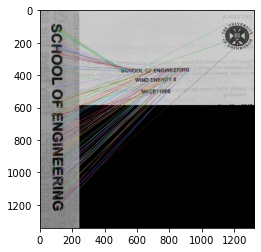

(<matplotlib.image.AxesImage at 0x20d88d1f8e0>, None)

In [50]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list as matches
img3 = cv2.drawMatchesKnn(img1,
                          kp1,
                          img2,
                          kp2,
                          good,
                          None,
                          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3), plt.show()

## FlANN based Matcher

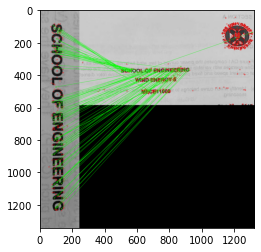

In [65]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0), 
                  singlePointColor = (255, 0, 0), 
                  matchesMask = matchesMask, 
                  flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.imshow(img3)
plt.show()

In [67]:
**draw_params

SyntaxError: invalid syntax (<ipython-input-67-981a3388051e>, line 1)

SyntaxError: invalid syntax (<ipython-input-62-68fbfcc8d503>, line 1)